In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\voidc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('weather_classification_data.csv')

In [4]:
#generated through chatgpt
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Step 2: Preprocess the dataset
# Encode categorical columns
# print(df['Weather Type'].value_counts())
categorical_columns = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])

# Separate features and target variable
X = df.drop(columns=['Weather Type'])  # Features
y = df['Weather Type']  # Target

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=9)  # k=5, can be tuned
knn.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred, labels=[0, 1, 3, 4]))
# Retrieve the LabelEncoder for 'Weather Type'
weather_type_encoder = label_encoders['Weather Type']

# Get the mapping of encoded values to original labels
mapping = {index: label for index, label in enumerate(weather_type_encoder.classes_)}
print("Mapping of numbers to Weather Type labels:", mapping)

Accuracy: 89.47%
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       651
           1       0.87      0.88      0.87       646
           3       0.93      0.94      0.93       701
           4       0.94      0.88      0.91       641

   micro avg       0.89      0.90      0.89      2639
   macro avg       0.90      0.89      0.89      2639
weighted avg       0.90      0.90      0.90      2639

Mapping of numbers to Weather Type labels: {0: 'Cloudy', 1: 'Rainy', 2: 'Rainy ', 3: 'Snowy', 4: 'Sunny'}


Accuracy: 89.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       651
           1       0.90      0.90      0.90       646
           3       0.97      0.93      0.95       701
           4       0.93      0.87      0.90       641

   micro avg       0.90      0.90      0.90      2639
   macro avg       0.90      0.90      0.90      2639
weighted avg       0.90      0.90      0.90      2639



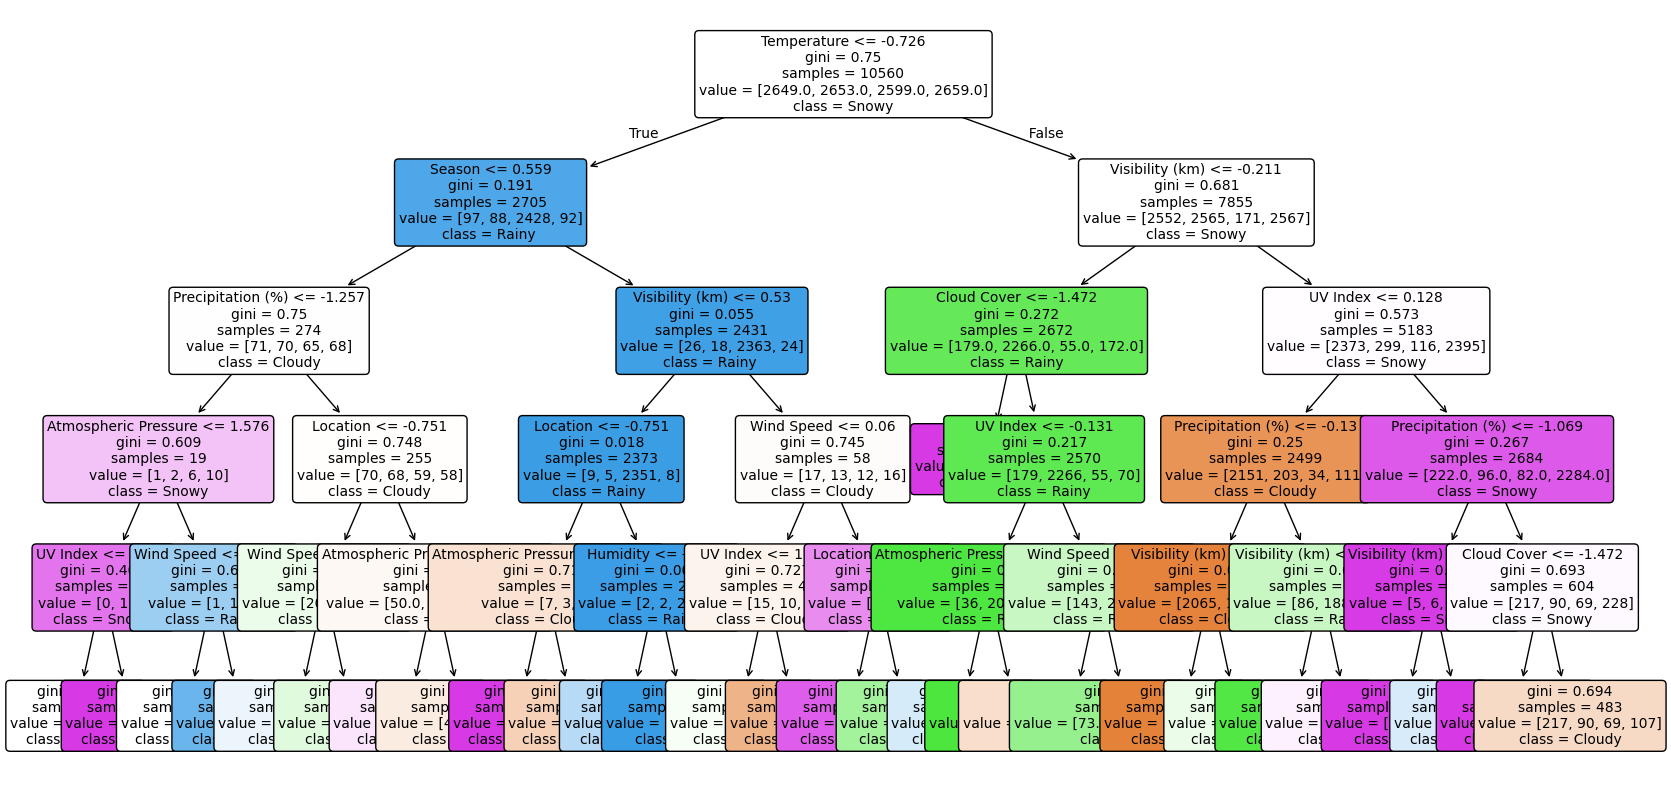

In [6]:
#generated through chatgpt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Step 2: Preprocess the dataset
# Encode categorical columns
categorical_columns = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])

# Separate features and target variable
X = df.drop(columns=['Weather Type'])  # Features
y = df['Weather Type']  # Target

# Normalize numerical features (optional for Decision Trees, but can help with interpretability)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)  # max_depth can be tuned
decision_tree.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=[0, 1, 3, 4]))  # Set to 0 or 1 to handle the warning

# Convert class names to strings
class_names = [str(cls) for cls in label_encoders['Weather Type'].classes_]

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    feature_names=df.drop(columns=['Weather Type']).columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()